### Differential Expression of CD vs Normal PBMCs

The goal of this analysis is to determine the genes that are expressed differently (higher or lower) between the PBMCs of the  Crohns Disease and Normal patients.

In [28]:
# Import our libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import from sklearn.
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib
matplotlib.style.use('ggplot')

pd.options.display.max_columns = 100
df = pd.read_csv('crohns.csv', index_col='ID_REF')

In [29]:
df.head()

,GSM76030,GSM76031,GSM76032,GSM76033,GSM76034,GSM76035,GSM76036,GSM76037,GSM76038,GSM76039,GSM76040,GSM76041,GSM76042,GSM76043,GSM76044,GSM76045,GSM76046,GSM76047,GSM76048,GSM76049,GSM76050,GSM76051,GSM76052,GSM76053,GSM76054,GSM76055,GSM76056,GSM76057,GSM76058,GSM76059,GSM76060,GSM76061,GSM76062,GSM76063,GSM76064,GSM76065,GSM76066,GSM76067,GSM76068,GSM76069,GSM76070,GSM76071,GSM76072,GSM76073,GSM76074,GSM76075,GSM76076,GSM76077,GSM76078,GSM76079,...,GSM76107,GSM76108,GSM76109,GSM76110,GSM76111,GSM76112,GSM76113,GSM76114,GSM76115,GSM76116,GSM76117,GSM76118,GSM76119,GSM76120,GSM76121,GSM76122,GSM76123,GSM76124,GSM76125,GSM76126,GSM76127,GSM76128,GSM76129,GSM76130,GSM76131,GSM76132,GSM76133,GSM76134,GSM76135,GSM76136,GSM76137,GSM76138,GSM76139,GSM76140,GSM76141,GSM76142,GSM76143,GSM76144,GSM76145,GSM76146,GSM76147,GSM76148,GSM76149,GSM76150,GSM76151,GSM76152,GSM76153,GSM76154,GSM76155,GSM76156
ID_REF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1007_s_at,6.382661,6.589557,6.608669,6.397301,6.231299,5.929730,6.074643,6.526892,6.729527,6.045421,6.331441,6.274374,6.496154,6.358507,6.158130,6.496644,6.185766,6.169309,6.598857,6.261507,6.359359,6.331351,6.285030,6.501876,5.735505,6.319850,6.073757,6.479443,6.193996,6.523940,6.071335,5.913494,6.774238,6.310667,6.040967,6.018622,6.078189,6.115689,5.697258,6.357936,6.110460,6.437110,6.412185,6.064644,6.470831,6.857042,5.769459,6.412313,6.249727,6.720460,...,6.858734,5.962292,6.253489,6.238440,6.537258,6.285958,6.027515,6.298321,6.335009,5.976928,5.946522,6.297048,6.756208,6.661990,6.524403,6.522643,6.119776,6.725851,5.904653,6.303294,6.634581,6.729989,5.935937,6.310515,6.129484,6.377719,5.941845,6.149118,6.095989,6.186103,6.123071,5.856623,6.015983,6.414365,5.842242,5.961018,5.633461,6.408309,6.173188,6.348845,6.202164,6.425718,6.323964,6.301666,6.402520,6.561243,5.743080,6.459312,6.385285,6.145335
1053_at,5.871326,4.878061,5.449387,4.899039,4.584867,5.209132,4.693102,3.977666,4.566600,5.102809,4.959941,5.079732,4.591336,4.912968,4.396805,4.477802,4.526972,5.213776,5.215913,4.785458,5.276424,5.229924,4.878334,4.641271,5.129132,4.751195,4.821506,4.894714,5.312187,4.831496,4.361319,4.254259,5.485159,4.607696,4.972134,5.006505,4.874971,5.293084,5.389189,5.310517,3.878980,5.001949,4.990839,4.689582,5.066674,4.953094,5.113617,5.435301,5.173542,4.788608,...,4.496257,4.802902,4.659385,5.136380,4.742369,4.846875,5.174210,5.244204,4.700032,4.502854,4.613833,4.410685,4.834576,4.861338,4.492312,4.561338,5.161655,4.407452,5.492558,4.627019,5.270660,4.250016,4.837356,5.021156,4.918464,4.475635,3.809461,4.415784,5.198838,4.745639,5.067949,4.559183,4.888661,5.824860,4.639751,4.328384,4.652291,4.525446,4.742527,4.542567,4.018870,4.869823,4.594830,4.692336,5.042849,4.782566,4.753444,5.138295,4.618365,4.353786
117_at,5.835663,5.921491,6.736059,6.043868,5.958280,5.852238,6.581454,5.679843,6.073959,5.858080,5.883117,5.993516,6.186025,5.996046,5.851926,6.456817,6.425097,5.869971,6.628892,5.933291,5.419400,6.160361,5.619221,5.778860,6.330025,5.574331,4.630328,5.605788,5.257950,4.449917,5.034140,5.400625,5.441565,5.668221,5.219335,5.599813,6.539672,7.018696,6.411289,5.802769,5.120004,5.266599,4.974462,4.852375,5.417188,8.170643,6.989161,5.623533,5.751630,4.680720,...,6.248449,5.370894,6.230972,5.870897,5.671046,6.377512,5.544193,6.102169,5.630438,6.135886,6.011312,5.361476,6.324106,6.443518,6.117733,5.428021,5.566092,6.977216,5.833707,6.524963,6.814857,6.619354,5.297264,6.242569,5.942064,5.977965,5.202133,5.999923,5.494490,5.771217,5.683317,5.791413,5.327446,5.746793,5.558513,6.360571,5.869865,5.677152,5.609986,6.125023,5.425782,5.182849,5.534319,5.654300,5.712656,6.079347,5.873668,5.945533,5.981726,5.419848
121_at,8.103100,8.443505,8.494700,7.895723,7.946928,8.134139,8.011350,8.199173,8.511109,8.347532,8.157562,8.136901,8.345359,8.184977,8.033005,8.035576,7.738157,8.068512,8.053709,8.067641,8.114891,8.031708,8.101416,8.153414,7.781820,7.955671,8.326602,

In [30]:
#construct three lists of disease types
UC = ['GSM76030', 'GSM76031', 'GSM76032', 'GSM76033', 'GSM76034', 'GSM76035', 'GSM76036', 'GSM76037', 'GSM76038', 'GSM76039',
     'GSM76040', 'GSM76041', 'GSM76042', 'GSM76043', 'GSM76044', 'GSM76045', 'GSM76046', 'GSM76047', 'GSM76048', 'GSM76049', 
     'GSM76050', 'GSM76051', 'GSM76052', 'GSM76053', 'GSM76054', 'GSM76055']

CD = ['GSM76056', 'GSM76057', 'GSM76058', 'GSM76059', 'GSM76060', 'GSM76061', 'GSM76062', 'GSM76063', 'GSM76064', 'GSM76065',
     'GSM76066', 'GSM76067', 'GSM76068', 'GSM76069', 'GSM76070', 'GSM76071', 'GSM76072', 'GSM76073', 'GSM76074', 'GSM76075',
     'GSM76076', 'GSM76077', 'GSM76078', 'GSM76079', 'GSM76080', 'GSM76081', 'GSM76082', 'GSM76083', 'GSM76084', 'GSM76085',
     'GSM76086', 'GSM76087', 'GSM76088', 'GSM76089', 'GSM76090', 'GSM76091', 'GSM76092', 'GSM76093', 'GSM76094', 'GSM76095',
     'GSM76096', 'GSM76097', 'GSM76098', 'GSM76099', 'GSM76100', 'GSM76101', 'GSM76102', 'GSM76103', 'GSM76104', 'GSM76105',
     'GSM76106', 'GSM76107', 'GSM76108', 'GSM76109', 'GSM76110', 'GSM76111', 'GSM76112', 'GSM76113', 'GSM76114']

NM = ['GSM76115', 'GSM76116', 'GSM76117', 'GSM76118', 'GSM76119', 'GSM76120', 'GSM76121', 'GSM76122', 'GSM76123', 'GSM76124', 
      'GSM76125', 'GSM76126', 'GSM76127', 'GSM76128', 'GSM76129', 'GSM76130', 'GSM76131', 'GSM76132', 'GSM76133', 'GSM76134', 
      'GSM76135', 'GSM76136', 'GSM76137', 'GSM76138', 'GSM76139', 'GSM76140', 'GSM76141', 'GSM76142', 'GSM76143', 'GSM76144', 
      'GSM76145', 'GSM76146', 'GSM76147', 'GSM76148', 'GSM76149', 'GSM76150', 'GSM76151', 'GSM76152', 'GSM76153', 'GSM76154', 
      'GSM76155', 'GSM76156']

In [31]:
#compare only CD and NM so will drop CD

cd = df.drop(columns=UC)

In [32]:
cd.head()

,GSM76056,GSM76057,GSM76058,GSM76059,GSM76060,GSM76061,GSM76062,GSM76063,GSM76064,GSM76065,GSM76066,GSM76067,GSM76068,GSM76069,GSM76070,GSM76071,GSM76072,GSM76073,GSM76074,GSM76075,GSM76076,GSM76077,GSM76078,GSM76079,GSM76080,GSM76081,GSM76082,GSM76083,GSM76084,GSM76085,GSM76086,GSM76087,GSM76088,GSM76089,GSM76090,GSM76091,GSM76092,GSM76093,GSM76094,GSM76095,GSM76096,GSM76097,GSM76098,GSM76099,GSM76100,GSM76101,GSM76102,GSM76103,GSM76104,GSM76105,...,GSM76107,GSM76108,GSM76109,GSM76110,GSM76111,GSM76112,GSM76113,GSM76114,GSM76115,GSM76116,GSM76117,GSM76118,GSM76119,GSM76120,GSM76121,GSM76122,GSM76123,GSM76124,GSM76125,GSM76126,GSM76127,GSM76128,GSM76129,GSM76130,GSM76131,GSM76132,GSM76133,GSM76134,GSM76135,GSM76136,GSM76137,GSM76138,GSM76139,GSM76140,GSM76141,GSM76142,GSM76143,GSM76144,GSM76145,GSM76146,GSM76147,GSM76148,GSM76149,GSM76150,GSM76151,GSM76152,GSM76153,GSM76154,GSM76155,GSM76156
ID_REF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1007_s_at,6.073757,6.479443,6.193996,6.523940,6.071335,5.913494,6.774238,6.310667,6.040967,6.018622,6.078189,6.115689,5.697258,6.357936,6.110460,6.437110,6.412185,6.064644,6.470831,6.857042,5.769459,6.412313,6.249727,6.720460,6.507124,5.573721,6.034489,5.560913,6.449540,6.606058,6.166005,5.458709,5.984609,6.473074,6.061145,5.984445,6.107115,6.651910,6.502437,6.727001,6.602522,6.218555,5.861260,6.917447,6.621767,6.773892,6.559339,5.854622,6.416390,6.467302,...,6.858734,5.962292,6.253489,6.238440,6.537258,6.285958,6.027515,6.298321,6.335009,5.976928,5.946522,6.297048,6.756208,6.661990,6.524403,6.522643,6.119776,6.725851,5.904653,6.303294,6.634581,6.729989,5.935937,6.310515,6.129484,6.377719,5.941845,6.149118,6.095989,6.186103,6.123071,5.856623,6.015983,6.414365,5.842242,5.961018,5.633461,6.408309,6.173188,6.348845,6.202164,6.425718,6.323964,6.301666,6.402520,6.561243,5.743080,6.459312,6.385285,6.145335
1053_at,4.821506,4.894714,5.312187,4.831496,4.361319,4.254259,5.485159,4.607696,4.972134,5.006505,4.874971,5.293084,5.389189,5.310517,3.878980,5.001949,4.990839,4.689582,5.066674,4.953094,5.113617,5.435301,5.173542,4.788608,4.977893,4.966231,5.238487,5.843106,4.490475,5.132728,3.817865,5.116208,4.770213,4.666003,5.206459,4.664170,5.143706,4.814863,4.221642,4.736269,4.176312,5.227773,5.119223,4.485952,5.480261,4.967559,4.143689,4.609251,5.103296,5.061839,...,4.496257,4.802902,4.659385,5.136380,4.742369,4.846875,5.174210,5.244204,4.700032,4.502854,4.613833,4.410685,4.834576,4.861338,4.492312,4.561338,5.161655,4.407452,5.492558,4.627019,5.270660,4.250016,4.837356,5.021156,4.918464,4.475635,3.809461,4.415784,5.198838,4.745639,5.067949,4.559183,4.888661,5.824860,4.639751,4.328384,4.652291,4.525446,4.742527,4.542567,4.018870,4.869823,4.594830,4.692336,5.042849,4.782566,4.753444,5.138295,4.618365,4.353786
117_at,4.630328,5.605788,5.257950,4.449917,5.034140,5.400625,5.441565,5.668221,5.219335,5.599813,6.539672,7.018696,6.411289,5.802769,5.120004,5.266599,4.974462,4.852375,5.417188,8.170643,6.989161,5.623533,5.751630,4.680720,5.507064,6.330960,6.667612,8.176896,5.694784,6.573464,7.178956,5.399936,5.476469,4.937230,6.970623,6.409427,5.470768,6.565419,5.310412,5.940312,6.574211,5.142489,6.552839,4.447533,2.843318,5.028513,5.549716,5.978831,5.350719,5.771431,...,6.248449,5.370894,6.230972,5.870897,5.671046,6.377512,5.544193,6.102169,5.630438,6.135886,6.011312,5.361476,6.324106,6.443518,6.117733,5.428021,5.566092,6.977216,5.833707,6.524963,6.814857,6.619354,5.297264,6.242569,5.942064,5.977965,5.202133,5.999923,5.494490,5.771217,5.683317,5.791413,5.327446,5.746793,5.558513,6.360571,5.869865,5.677152,5.609986,6.125023,5.425782,5.182849,5.534319,5.654300,5.712656,6.079347,5.873668,5.945533,5.981726,5.419848
121_at,8.326602,8.238403,8.147193,8.553576,7.855156,7.748579,8.538472,8.041587,7.835483,8.070539,8.047381,7.684614,7.964292,8.067246,7.928308,8.108317,8.391588,8.095294,8.375151,8.211907,7.648273,8.293901,8.245957,8.337700,7.957588,7.948497,7.810091,

In [33]:
cd.describe()

,GSM76056,GSM76057,GSM76058,GSM76059,GSM76060,GSM76061,GSM76062,GSM76063,GSM76064,GSM76065,GSM76066,GSM76067,GSM76068,GSM76069,GSM76070,GSM76071,GSM76072,GSM76073,GSM76074,GSM76075,GSM76076,GSM76077,GSM76078,GSM76079,GSM76080,GSM76081,GSM76082,GSM76083,GSM76084,GSM76085,GSM76086,GSM76087,GSM76088,GSM76089,GSM76090,GSM76091,GSM76092,GSM76093,GSM76094,GSM76095,GSM76096,GSM76097,GSM76098,GSM76099,GSM76100,GSM76101,GSM76102,GSM76103,GSM76104,GSM76105,...,GSM76107,GSM76108,GSM76109,GSM76110,GSM76111,GSM76112,GSM76113,GSM76114,GSM76115,GSM76116,GSM76117,GSM76118,GSM76119,GSM76120,GSM76121,GSM76122,GSM76123,GSM76124,GSM76125,GSM76126,GSM76127,GSM76128,GSM76129,GSM76130,GSM76131,GSM76132,GSM76133,GSM76134,GSM76135,GSM76136,GSM76137,GSM76138,GSM76139,GSM76140,GSM76141,GSM76142,GSM76143,GSM76144,GSM76145,GSM76146,GSM76147,GSM76148,GSM76149,GSM76150,GSM76151,GSM76152,GSM76153,GSM76154,GSM76155,GSM76156
count,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,...,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000
mean,5.117655,5.169349,4.992013,5.131158,4.947674,4.917584,5.394539,4.964877,4.865968,4.948043,5.059827,5.061648,4.984194,4.993731,4.845193,5.111969,5.056283,5.001174,5.227631,5.227523,5.016745,5.149438,5.030719,5.199529,5.004344,4.988830,5.015540,4.920062,5.100417,5.093481,5.002725,5.035604,4.988486,5.015442,5.054089,5.329586,5.095873,5.192346,5.102810,5.311456,5.245274,4.979278,4.957926,5.025284,5.013717,5.282793,5.042176,4.986797,5.041841,5.068134,...,5.094226,5.054635,5.396235,5.227707,5.218840,4.915016,5.120552,5.026895,5.165854,5.069466,5.044676,5.147873,5.217989,5.088860,5.107344,5.152474,5.045718,5.269295,4.933681,4.987804,5.098653,5.097454,4.993117,5.158922,4.978454,5.051406,4.887508,5.015136,5.021520,4.981466,4.958812,5.149870,5.018019,5.281794,4.971117,5.106086,4.856792,5.018933,5.077267,5.117289,5.052538,4.981282,4.993106,5.050037,5.070986,5.264874,4.820503,5.022019,5.177019,5.074672
std,2.431533,2.379309,2.542861,2.442274,2.578428,2.622004,2.165066,2.610187,2.633781,2.628837,2.472114,2.476782,2.587452,2.541589,2.688028,2.429889,2.503174,2.521762,2.394623,2.375684,2.521195,2.433307,2.519299,2.372644,2.581522,2.605847,2.562415,2.611100,2.510218,2.485464,2.508757,2.540595,2.538722,2.564898,2.513986,2.172903,2.475215,2.398645,2.519126,2.331796,2.394796,2.564368,2.610359,2.558208,2.568670,2.333365,2.496558,2.548437,2.534954,2.539554,...,2.549879,2.527600,2.200431,2.405462,2.394050,2.578460,2.468504,2.506634,2.454024,2.514371,2.541655,2.441080,2.441914,2.540155,2.492612,2.466564,2.582823,2.368438,2.681412,2.586125,2.563877,2.525861,2.578652,2.481214,2.592194,2.562839,2.665670,2.570792,2.580074,2.571767,2.629930,2.450902,2.568505,2.356740,2.610413,2.503192,2.699232,2.582058,2.518554,2.487787,2.538459,2.603363,2.588593,2.540375,2.513317,2.355090,2.72

In [34]:
# Transpose the dataframe such that the patients are the rows and the genes are the columns (features)

t_cd = StandardScaler().fit_transform(cd.T)

### PCA Analysis

In [35]:
pca = PCA()

In [36]:
pca.fit(t_cd)

PCA()

In [37]:
pca_data = pca.transform(t_cd)

In [38]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

In [39]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] #from StatQuest:PCA in Python on youtube.com 

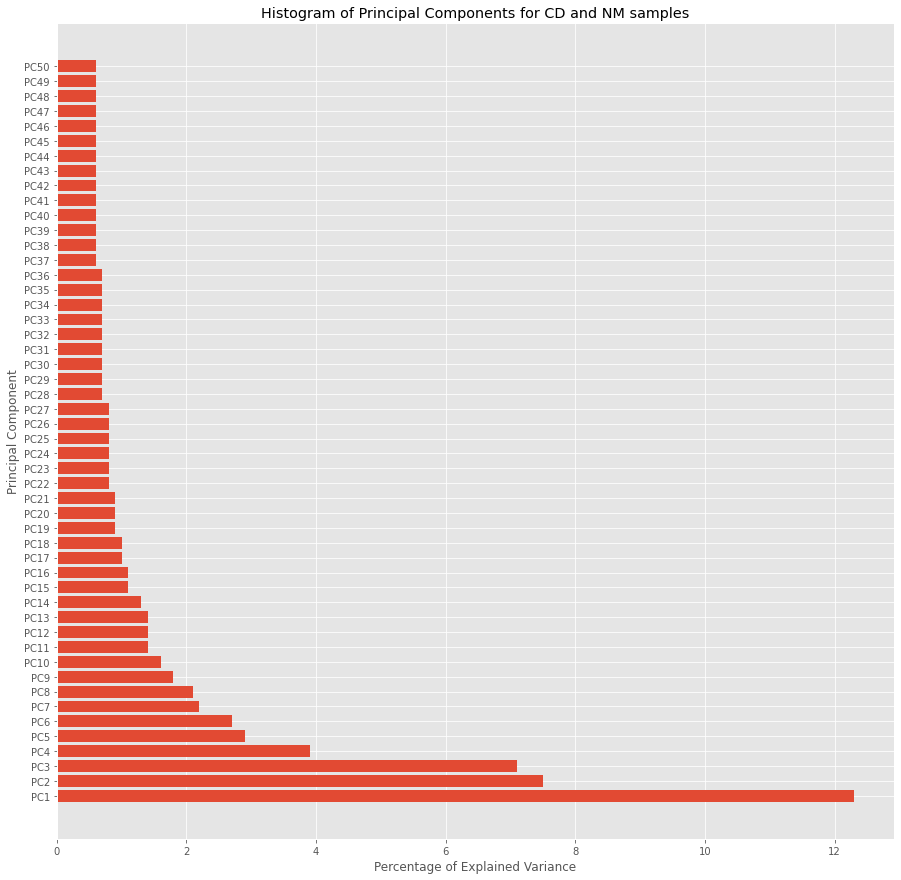

In [40]:
plt.figure(figsize = (15, 15))
plt.barh(y=range(1,len(per_var)+1)[:50], width=per_var[:50], tick_label=labels[:50])
plt.ylabel('Principal Component')
plt.xlabel('Percentage of Explained Variance')
plt.title('Histogram of Principal Components for CD and NM samples')
plt.show()

In [41]:
pca_df = pd.DataFrame(pca_data, index=cd.columns, columns=labels)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,...,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101
GSM76056,20.208204,-59.115625,1.705811,-16.926401,39.436176,23.117380,-5.340036,-6.786688,-41.452130,7.357299,14.722862,7.867256,-7.957231,15.422801,27.645416,-4.727972,17.285923,-11.519260,-1.409102,16.681927,-16.427540,-6.357103,34.338786,2.113093,-10.901641,0.763517,-36.021833,17.267949,-2.262910,11.547477,-9.661702,33.205102,-3.814483,-14.024519,23.103758,-3.766912,23.247880,-16.405055,11.108808,8.216274,-13.865551,-1.563992,-13.665315,-13.611768,1.708843,-14.377822,-12.704399,-17.509940,-19.135978,15.865040,...,1.721501,12.166860,13.960188,-7.160829,-3.767654,-3.086645,-14.017187,-0.480608,-7.858030,21.535006,9.469422,17.649289,7.670560,9.316810,-1.888391,-2.033792,-12.393541,-4.914015,-18.196089,4.528631,3.121837,6.598529,11.601699,-1.018744,0.798076,-18.861526,-9.425226,-3.237497,-0.639786,4.608408,-1.082397,8.689000,3.485584,-1.620567,10.113211,-1.325284,2.615133,-0.427379,-0.965524,-4.475199,3.610535,-0.399888,-3.040890,0.436070,-3.747747,-1.207528,-1.176676,-0.499071,-4.248160,2.220446e-15
GSM76057,20.904791,-40.407024,23.477389,-44.374169,16.592523,2.480868,11.851855,-23.328424,-13.028681,12.466268,24.218778,22.978998,9.299862,-39.880267,16.029143,-13.245500,18.398970,41.846661,11.942881,-25.847150,-0.195855,-1.534906,8.080632,-14.089608,-1.819780,-10.141476,-26.075838,4.013251,7.055635,28.314544,-19.480875,6.868260,3.657333,-0.988126,34.545463,11.990675,1.276436,18.446772,-28.454066,16.159636,1.592563,1.998304,-11.538256,18.997004,18.263902,20.156546,7.138138,30.022525,3.655256,-3.882263,...,-1.616506,-13.742717,-17.104748,-2.268474,11.996683,-8.743618,0.602359,-6.505224,14.271591,-0.671635,-8.307099,-5.374226,-4.211708,3.507293,3.072995,-10.531358,10.745359,0.061605,2.137038,3.387838,3.444351,7.072282,7.110221,1.070182,5.113317,5.445022,10.667996,-6.764023,3.864227,-6.062463,1.529673,-5.098404,1.582307,-3.844013,-8.695378,3.976184,-3.375923,-4.854338,3.013361,-0.133293,-9.736136,0.106287,-1.033334,1.326978,0.504055,5.187205,-0.947714,-2.576684,5.039122,9.492407e-15
GSM76058,11.495320,23.244704,73.907021,-15.539552,-20.540368,28.504110,15.767012,12.496777,3.415331,-9.825021,-2.897182,-5.647714,-1.070601,10.042534,0.857331,12.820094,-10.618077,-9.391208,6.415082,16.049399,-1.843246,-20.697446,-3.987719,5.066701,21.976788,9.943954,-8.916664,-2.710208,-2.782972,-0.232195,6.943693,16.297699,-0.429335,7.141382,13.386847,2.027250,5.508390,-6.769155,-4.471953,-19.657403,14.937918,-4.056784,-5.700671,31.907707,-5.612225,-16.946518,-4.185521,8.061834,19.928200,-8.263153,...,16.897502,-4.674444,-2.873043,-24.460045,-5.372080,-22.777472,-2.135319,-12.193058,17.947863,6.518412,17.181716,-7.611625,-3.989671,-18.735204,-11.666595,-2.844915,-19.666299,-11.674170,-6.539194,-7.047618,-5.828222,14.741244,-12.362470,0.176552,10.568791,6.649341,9.396915,28.193806,-2.551867,2.562996,-5.670364,-8.461334,5.019550,2.995829,8.833976,-11.058251,14.915971,-17.491681,3.014805,8.956841,-5.596258,-1.884221,-15.653443,-6.744091,-3.806593,4.691658,2.342280,7.826574,3.765001,1.747213e-14
GSM76059,103.800704,-29.003560,12.688901,13.311587,-25.502515,70.665852,6.142871,-32.363147,8.946512,11.019633,6.315981,-32.246302,-36.228248,-42.763757,52.883630,4.547175,24.036617,-33.352485,29.915992,-10.597735,-4.333961,13.434837,13.043600,4.696175,-27.597411,32.335805,14.308122,23.258314,30.869976,-34.119924,7.615485,-2.052312,-19.681078,3.337691,-19.204526,8.166894,-2.424332,-4.519079,-6.433777,-7.107448,-6.057101,-4.661230,5.581816,7.964828,-0.201580,5.736620,7.350046,

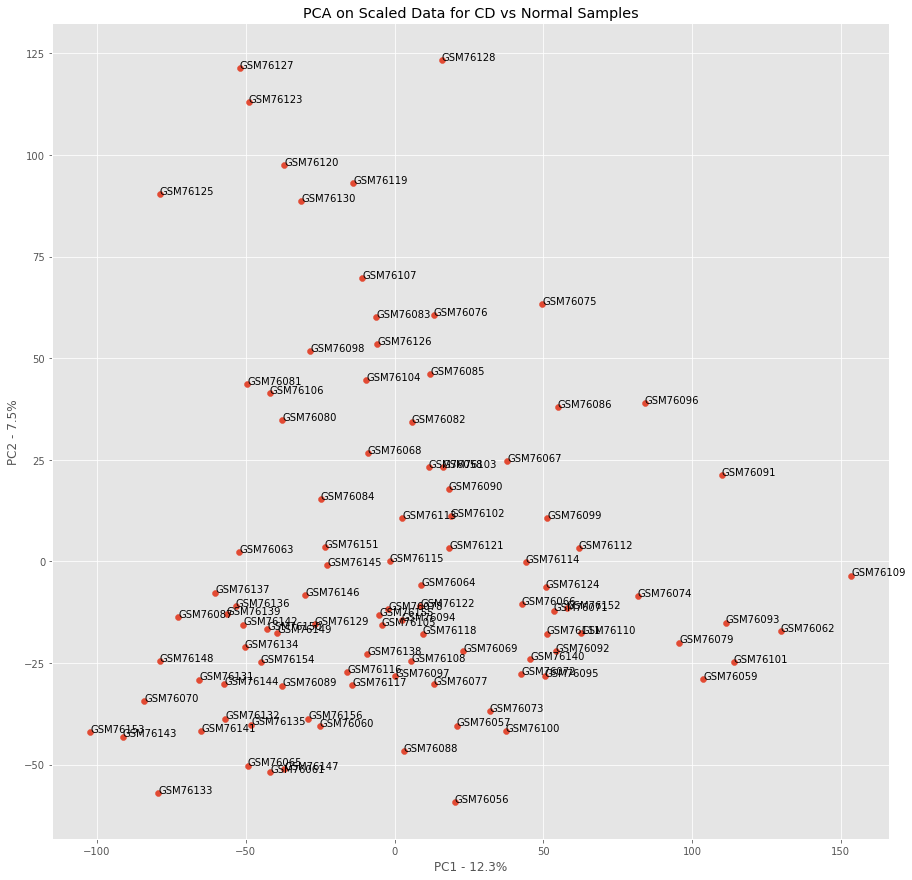

In [42]:
#Scatterplot of data with first and second principal components
plt.figure(figsize = (15, 15))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA on Scaled Data for CD vs Normal Samples')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()

### Determine which genes are differentially expressed

In [43]:
loading_scores = pd.Series(pca.components_[0], index=cd.index)

In [44]:
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False) #Sort based on magnitude (absolute value)

In [45]:
top_genes = sorted_loading_scores[0:50].index.values
top_genes

array(['205918_at', '211162_x_at', '206725_x_at', '207140_at',
       '207685_at', '217117_x_at', '211788_s_at', '48612_at',
       '216993_s_at', '205600_x_at', '210504_at', '212383_at',
       '200750_s_at', '221870_at', '216671_x_at', '214093_s_at',
       '55705_at', '217377_x_at', '220947_s_at', '205902_at',
       '202426_s_at', '210051_at', '78047_s_at', '213025_at', '207035_at',
       '209018_s_at', '216854_at', '34408_at', '208988_at', '220584_at',
       '219107_at', '205575_at', '221966_at', '217040_x_at', '208494_at',
       '222083_at', '206196_s_at', '221836_s_at', '202410_x_at',
       '203721_s_at', '336_at', '209067_s_at', '207708_at', '202974_at',
       '210395_x_at', '218067_s_at', '204682_at', '207288_at',
       '203661_s_at', '220531_at'], dtype=object)

### NCBI GEO2R Analysis via limma and UMAP libraries

In [49]:
geo_cd = pd.read_csv('cd_vs_nm.top.table.csv', index_col='ID')
geo_df = geo_cd['Gene.title'][:10]
geo_df

ID
215071_s_at                              histone cluster 1, H2ac
209806_at                                histone cluster 1, H2bk
201121_s_at           progesterone receptor membrane component 1
204614_at                               serpin family B member 2
202708_s_at                              histone cluster 2, H2be
203414_at      monocyte to macrophage differentiation associated
202391_at      brain abundant membrane attached signal protein 1
213338_at            transmembrane protein 158 (gene/pseudogene)
209911_x_at                              histone cluster 1, H2bd
200602_at                         amyloid beta precursor protein
Name: Gene.title, dtype: object

In [50]:
genes = []
for id in top_genes:
    result = geo_cd.loc[id]
    genes.append(result[-1])
genes

top50 = list(zip(top_genes, genes))
cd_top50 = pd.DataFrame(top50, columns = ['ID', 'PCA Differential'])
cd_top50.head()

,ID,PCA Differential
0,205918_at,solute carrier family 4 member 3
1,211162_x_at,stearoyl-CoA desaturase
2,206725_x_at,bone morphogenetic protein 1
3,207140_at,"alkaline phosphatase, intestinal"
4,207685_at,crystallin beta B3


In [52]:
compare = cd_top50['PCA Differential'][:10]
compare

0                     solute carrier family 4 member 3
1                              stearoyl-CoA desaturase
2                         bone morphogenetic protein 1
3                     alkaline phosphatase, intestinal
4                                   crystallin beta B3
5    mucin 3B, cell surface associated///mucin 3A, ...
6    HAUS augmin like complex subunit 7///three pri...
7                              NEDD4 binding protein 1
8                       collagen type XI alpha 2 chain
9                                          homeobox B5
Name: PCA Differential, dtype: object

In [53]:
compare = pd.DataFrame(list(zip(compare, geo_df[:10])), columns=['PCA Differential/CD vs NM', 'Bioconductor Differential/CD vs NM'])
compare.head(10)

,PCA Differential/CD vs NM,Bioconductor Differential/CD vs NM
0,solute carrier family 4 member 3,"histone cluster 1, H2ac"
1,stearoyl-CoA desaturase,"histone cluster 1, H2bk"
2,bone morphogenetic protein 1,progesterone receptor membrane component 1
3,"alkaline phosphatase, intestinal",serpin family B member 2
4,crystallin beta B3,"histone cluster 2, H2be"
5,"mucin 3B, cell surface associated///mucin 3A, ...",monocyte to macrophage differentiation associated
6,HAUS augmin like complex subunit 7///three pri...,brain abundant membrane attached signal protein 1
7,NEDD4 binding protein 1,transmembrane protein 158 (gene/pseudogene)
8,collagen type XI alpha 2 chain,"histone cluster 1, H2bd"
9,homeobox B5,amyloid beta precursor protein


### KMeans Clustering

In [54]:
cd_km = pd.DataFrame(pca_df, columns=['PC1', 'PC2'])
cd_km

,PC1,PC2
GSM76056,20.208204,-59.115625
GSM76057,20.904791,-40.407024
GSM76058,11.495320,23.244704
GSM76059,103.800704,-29.003560
GSM76060,-25.119383,-40.549256
...,...,...
GSM76152,57.940092,-11.462753
GSM76153,-102.268312,-42.030083
GSM76154,-45.015100,-24.706416
GSM76155,-5.074518,-13.266667


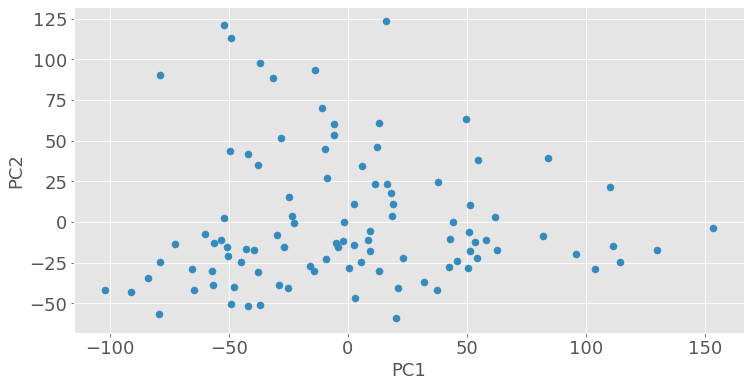

In [55]:
# Plot the scatter
ax = cd_km.plot(kind="scatter", x='PC1', y='PC2', figsize=(12,6), s=50)
plt.xlabel("PC1", fontsize=18)
plt.ylabel("PC2", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [56]:
X = cd_km.loc[:, ['PC1', 'PC2']]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

### Comparing 2 clusters

In [57]:
km = KMeans(n_clusters=2, random_state=42)
km.fit(X_sc)

KMeans(n_clusters=2, random_state=42)

In [58]:
km.cluster_centers_

array([[ 0.05461081, -0.44521223],
       [-0.19610245,  1.59871665]])

In [59]:
km.predict(X_sc)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [60]:
cd_km['cluster'] = km.labels_
cd_km

,PC1,PC2,cluster
GSM76056,20.208204,-59.115625,0
GSM76057,20.904791,-40.407024,0
GSM76058,11.495320,23.244704,0
GSM76059,103.800704,-29.003560,0
GSM76060,-25.119383,-40.549256,0
...,...,...,...
GSM76152,57.940092,-11.462753,0
GSM76153,-102.268312,-42.030083,0
GSM76154,-45.015100,-24.706416,0
GSM76155,-5.074518,-13.266667,0


In [61]:
actuals = []
for item in CD:
    actuals.append(0)


In [62]:
for item in NM:
    actuals.append(1)

In [63]:
cd_km['actual'] = actuals
cd_km

,PC1,PC2,cluster,actual
GSM76056,20.208204,-59.115625,0,0
GSM76057,20.904791,-40.407024,0,0
GSM76058,11.495320,23.244704,0,0
GSM76059,103.800704,-29.003560,0,0
GSM76060,-25.119383,-40.549256,0,0
...,...,...,...,...
GSM76152,57.940092,-11.462753,0,1
GSM76153,-102.268312,-42.030083,0,1
GSM76154,-45.015100,-24.706416,0,1
GSM76155,-5.074518,-13.266667,0,1


In [64]:
cd_km.groupby('cluster').mean()

,PC1,PC2,actual
cluster,,,
0,2.859596,-18.159551,0.430380
1,-10.268548,65.209297,0.363636


In [65]:
centroids = pd.DataFrame(
    sc.inverse_transform(km.cluster_centers_),
    columns=['PC1', 'PC2']
)
centroids

,PC1,PC2
0,2.859596,-18.159551
1,-10.268548,65.209297


<Figure size 504x504 with 0 Axes>

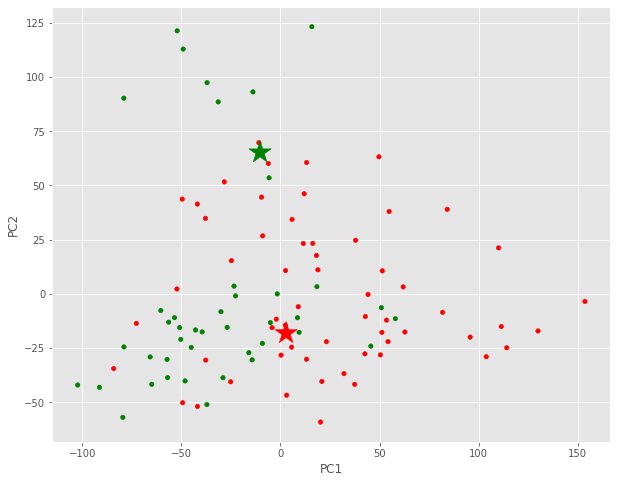

In [67]:
# Code modified from Generally Assembly Data Science Immersive-KMeans Lesson

plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green"]
cd_km['color'] = cd_km['actual'].map(lambda p: colors[p])


ax = cd_km.plot(    
    kind="scatter", 
    x='PC1', y='PC2',
    figsize=(10,8),
    c = cd_km['color']
)

centroids.plot(
    kind="scatter", 
    x='PC1', y='PC2', 
    marker="*", c=["r", "g"], s=550,
    ax=ax
);

### Compare to UMAP in limma/Bioconductor

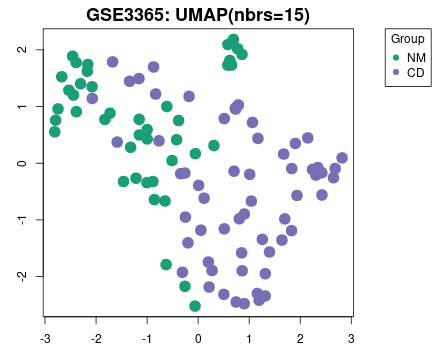
